# Load and Explore Data


In [10]:
import pandas as pd

df = pd.read_csv('Superstore.csv')

print(df.head())

print(df.info())

print(df.describe())

         Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0  CA-2016-152156  11/08/2016  11/11/2016    Second Class    CG-12520   
1  CA-2016-152156  11/08/2016  11/11/2016    Second Class    CG-12520   
2  CA-2016-138688  06/12/2016  06/16/2016    Second Class    DV-13045   
3  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region       Product ID         Category Sub-Category  \
0        42420  South  FUR

# Clean and Preprocess Data

In [11]:
print(df.isnull().sum())

df.drop(['Postal Code'], axis=1, inplace=True)

df.drop_duplicates(inplace=True)

df = df[(df['Sales'] < df['Sales'].quantile(0.95)) & (df['Profit'] < df['Profit'].quantile(0.95))]

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


# Exploratory Data Analysis (EDA)

In [12]:
# Top 10 best-selling products
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
print(top_products)

# Sales by category
sales_by_category = df.groupby('Category')['Sales'].sum()
print(sales_by_category)

# Sales and profit by region
region_sales_profit = df.groupby('Region')[['Sales', 'Profit']].sum()
print(region_sales_profit)

Product Name
Bush Somerset Collection Bookcase               261.960
Staples File Caddy                               22.368
Self-Adhesive Address Labels for Typewriters     14.620
Name: Sales, dtype: float64
Category
Furniture          261.960
Office Supplies     36.988
Name: Sales, dtype: float64
          Sales   Profit
Region                  
South   284.328  44.4300
West     14.620   6.8714


# Visualize Results

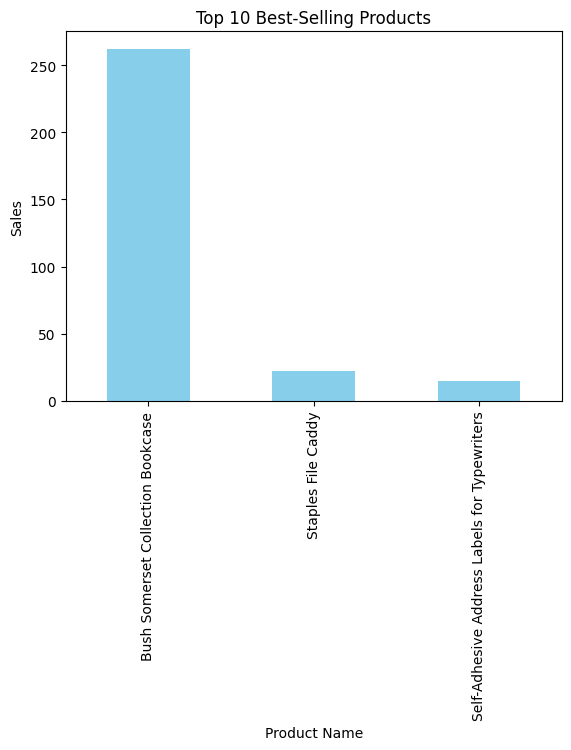

In [13]:
import matplotlib.pyplot as plt

# Bar plot: top 10 best-selling products
top_products.plot(kind='bar', color='skyblue')
plt.title('Top 10 Best-Selling Products')
plt.ylabel('Sales')
plt.show()

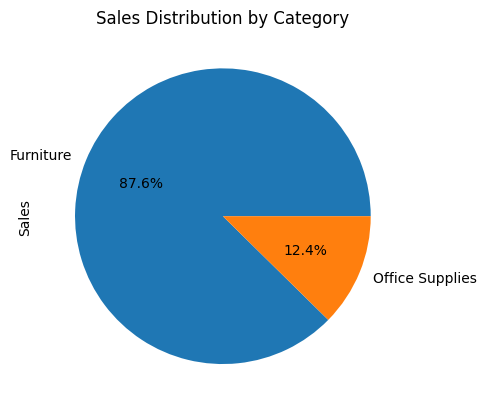

In [14]:
# pie chart: sales by category
sales_by_category.plot(kind='pie', autopct='%1.1f%%')
plt.title('Sales Distribution by Category')
plt.show()

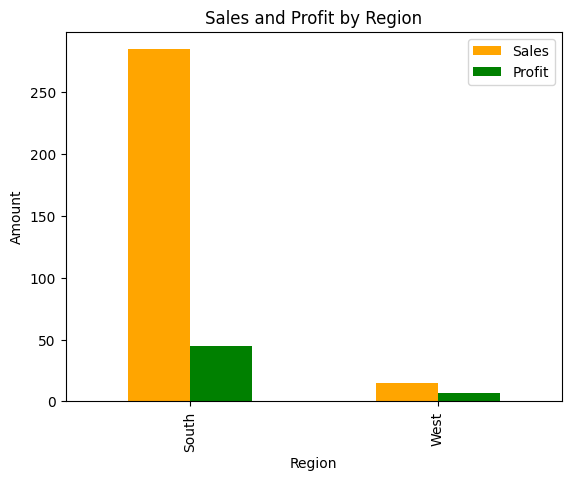

In [15]:
# Bar plot: sales and profit by region
region_sales_profit.plot(kind='bar', color=['orange', 'green'])
plt.title('Sales and Profit by Region')
plt.ylabel('Amount')
plt.show()